In [31]:
import sys 
sys.path.append('..')

import pymongo
import quarantines as Q 
import matplotlib.pyplot as plt 
import quarantines_mongo as qm 
from bson.objectid import ObjectId
import numpy as np
import seaborn as sns

In [3]:
client = pymongo.MongoClient('10.157.90.169', 27017)

In [7]:
plc_qtines = list(client.quarantine20.plc_qtines.find())

In [11]:
plc_graphs = set(_['graph_id'] for _ in plc_qtines)
graph_lookup = {} 
for plc_graph in plc_graphs:
    graph_lookup[plc_graph] = client.quarantine20.graphs.find_one(plc_graph)

In [13]:
plc_epis = set(_['epidemic_id'] for _ in plc_qtines)
epi_lookup = {} 
for plc_epi in plc_epis:
    epi_lookup[plc_epi] = client.quarantine20.epidemics.find_one(plc_epi)

In [47]:
avg = lambda l: sum(l) / len(l)

def make_grid_dict(graph_id, epi_id):
    docs = [_ for _ in plc_qtines if _['graph_id'] == graph_id and _['epidemic_id'] == epi_id]
    data_dict = {}
    for doc in docs:
        data_dict[tuple(doc['qtine_data'])] = doc
    return data_dict


def collect_final_rs(grid_dict):
    # returns y-axis, x-axis, grid 
    unique_0keys = sorted(set(_[0] for _ in grid_dict))
    unique_1keys = sorted(set(_[1] for _ in grid_dict))
    
    grid = np.zeros((len(unique_0keys), len(unique_1keys)))
    for i, k0 in enumerate(unique_0keys):
        for j, k1 in enumerate(unique_1keys):
            if (k0,k1) not in grid_dict:
                continue 
            else:
                grid[i][j] = avg(grid_dict[(k0, k1)]['final_Rs'])
    return unique_0keys, unique_1keys, grid


def collect_max_is(grid_dict):
    # returns y-axis, x-axis, grid 
    unique_0keys = sorted(set(_[0] for _ in grid_dict))
    unique_1keys = sorted(set(_[1] for _ in grid_dict))
    
    grid = np.zeros((len(unique_0keys), len(unique_1keys)))
    for i, k0 in enumerate(unique_0keys):
        for j, k1 in enumerate(unique_1keys):
            if (k0,k1) not in grid_dict:
                continue 
            else:
                grid[i][j] = avg(grid_dict[(k0, k1)]['max_Is'])
    return unique_0keys, unique_1keys, grid

In [45]:
graph_lookup

{ObjectId('5f29caf82518e5b6d7ce6db1'): {'_id': ObjectId('5f29caf82518e5b6d7ce6db1'),
  'process': 'powerlaw_cluster',
  'N': 10000,
  'params': {'m': 3, 'p': 0.4},
  'seed': 408991},
 ObjectId('5f29d5f92518e5b6d7ce74b9'): {'_id': ObjectId('5f29d5f92518e5b6d7ce74b9'),
  'process': 'powerlaw_cluster',
  'N': 10000,
  'params': {'m': 5, 'p': 0.4},
  'seed': 498141}}

In [33]:
r1 = ObjectId('5f29cf202518e5b6d7ce70b5')
m3 = ObjectId('5f29caf82518e5b6d7ce6db1')



EPIPARAMS:  0.1 1.0 0.1
EPIPARAMS:  0.1 0.5 0.2


/home/matt/config/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


EPIPARAMS:  0.1 0.2 0.5
EPIPARAMS:  0.1 0.1 1.0
EPIPARAMS:  0.1 0.05 2.0
EPIPARAMS:  0.1 0.02 5.0
EPIPARAMS:  0.1 0.01 10.0


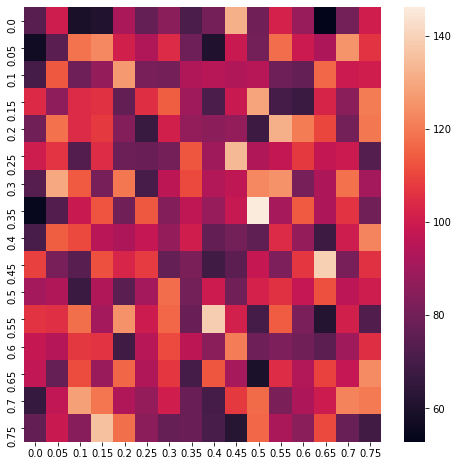

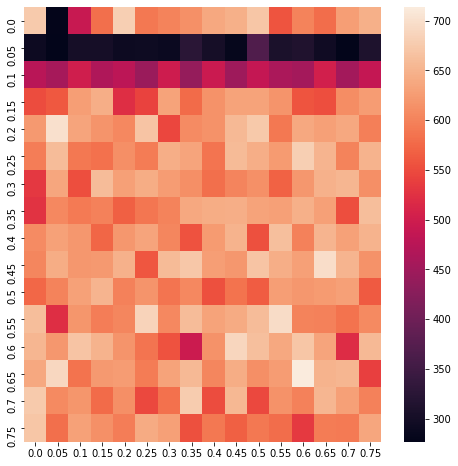

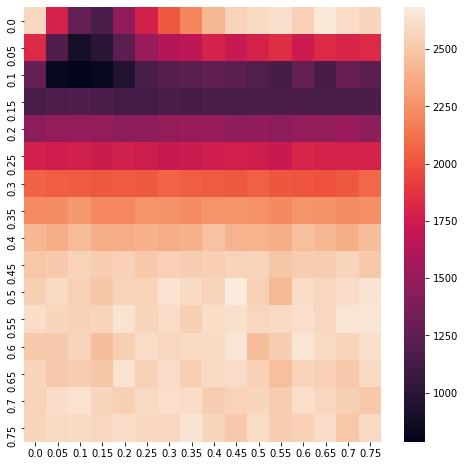

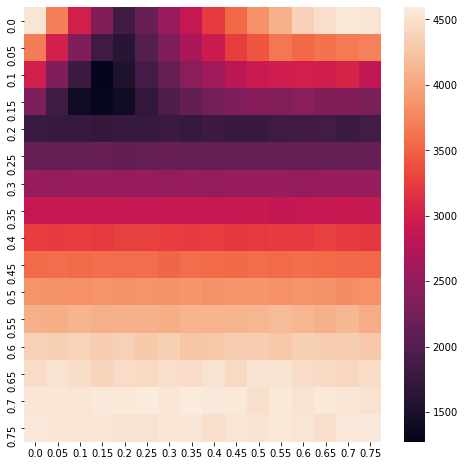

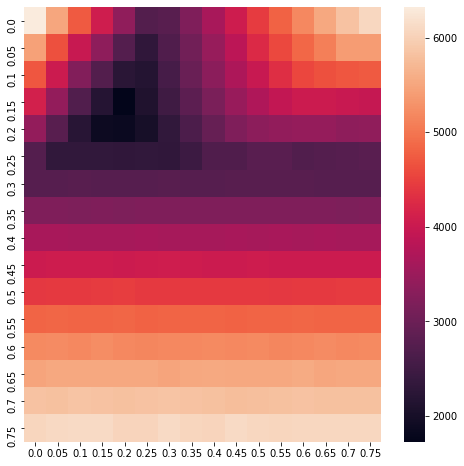

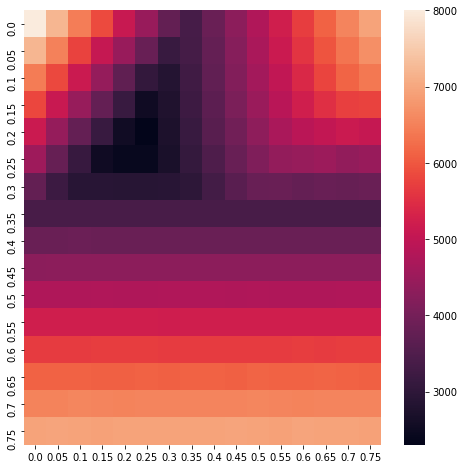

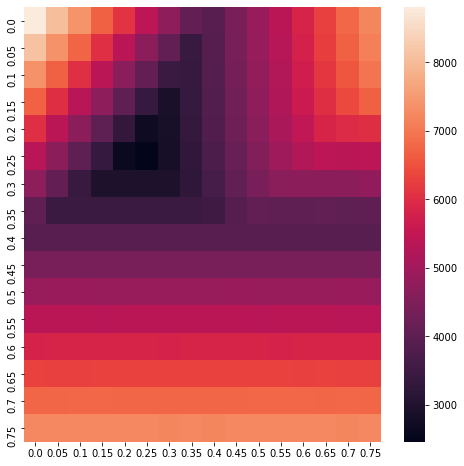

In [54]:
for epi_id, epi_params in sorted(epi_lookup.items(), key=lambda p: p[1]['tau'] / p[1]['gamma']):
    print("EPIPARAMS: ", epi_params['tau'], epi_params['gamma'], epi_params['tau'] / epi_params['gamma'])
    
    fig, ax = plt.subplots(figsize=(8,8))
    ytik, xtik, hm = collect_max_is(make_grid_dict(m3, epi_id))
    sns.heatmap(hm, yticklabels=ytik, xticklabels=xtik, ax=ax)
    fig.show()

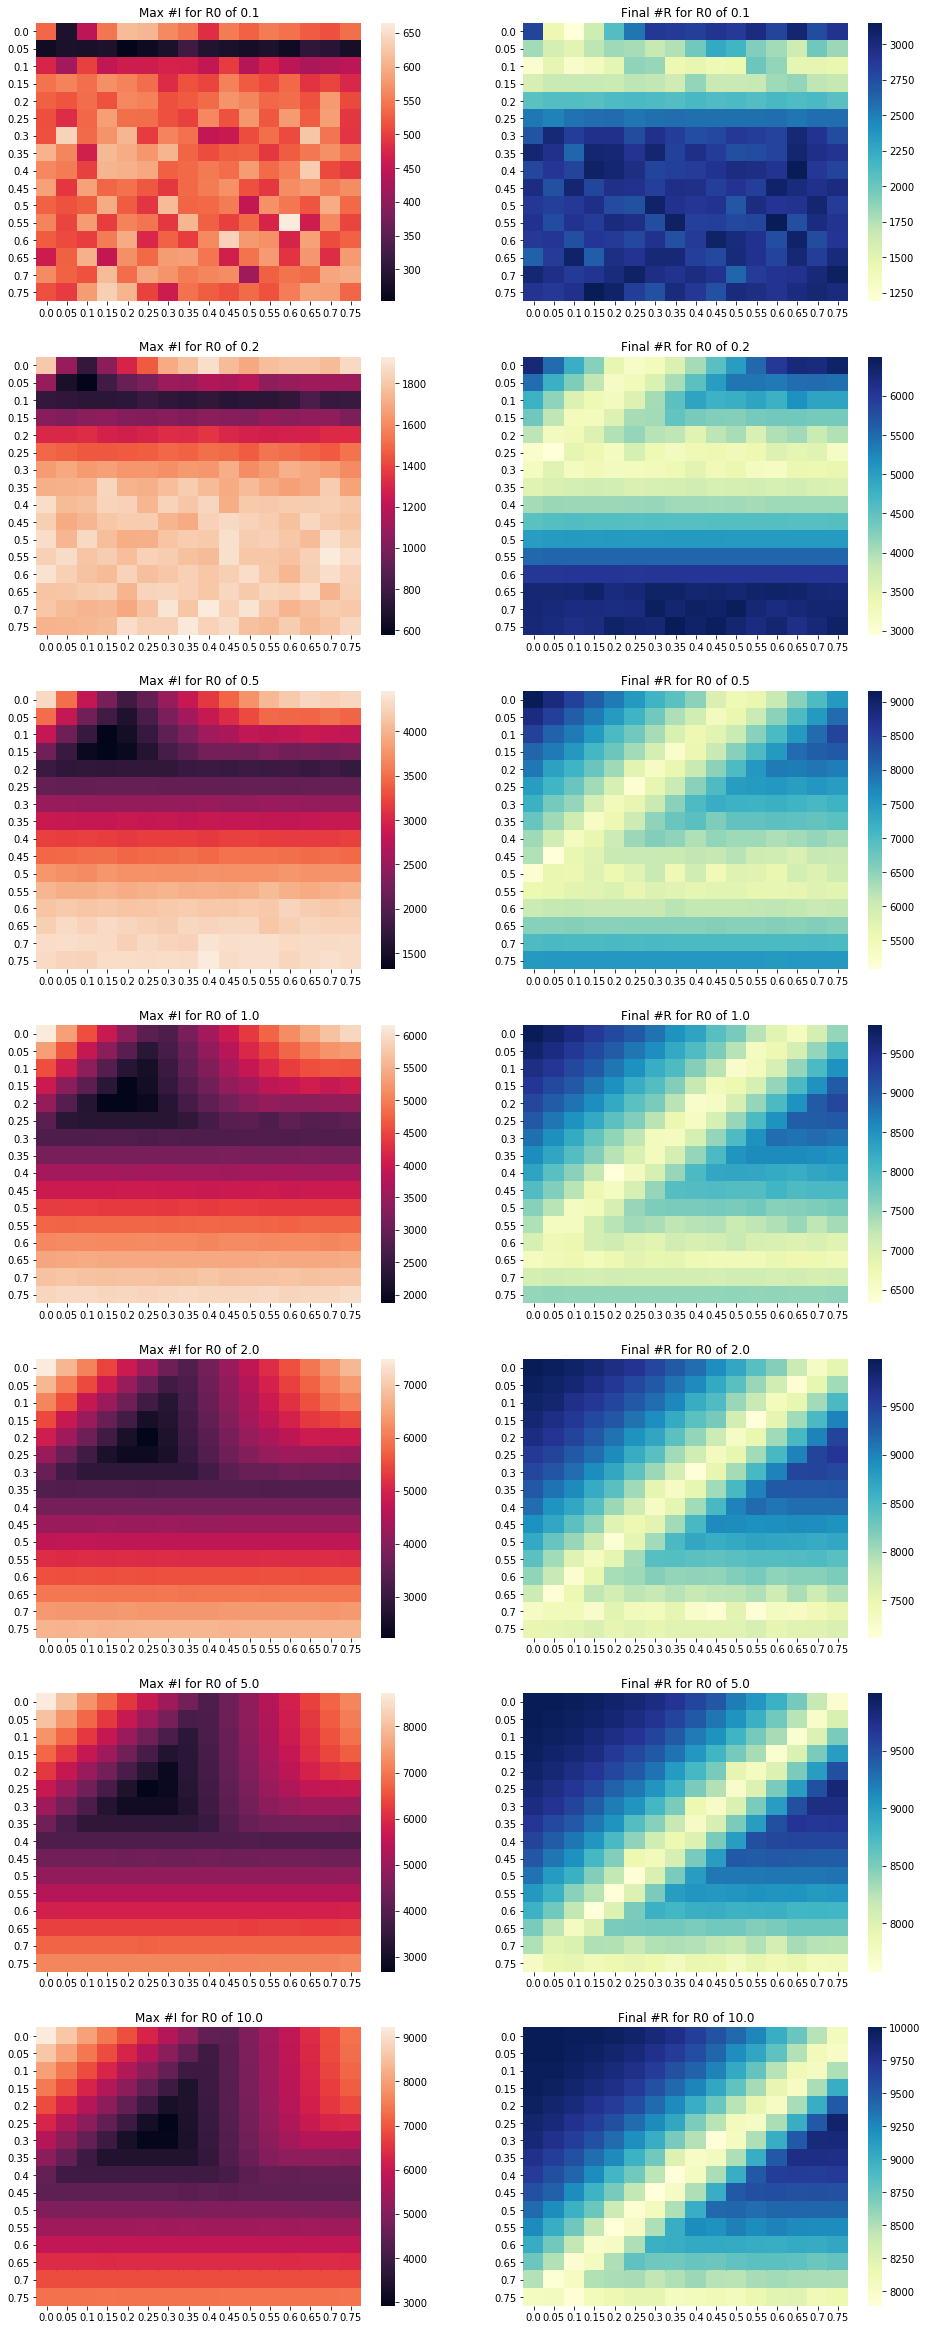

In [66]:
m5 = ObjectId('5f29d5f92518e5b6d7ce74b9')
# Want 8, 6 per cell 

fig, ax = plt.subplots(7, 2, figsize=(16, 42))
for i, (epi_id, epi_params) in enumerate(sorted(epi_lookup.items(), key=lambda p: p[1]['tau'] / p[1]['gamma'])):
    r_not = epi_params['tau'] / epi_params['gamma']
    
    ytik, xtik, hm = collect_max_is(make_grid_dict(m5, epi_id))
    sns.heatmap(hm, yticklabels=ytik, xticklabels=xtik, ax=ax[i][0])
    ax[i][0].set_title("Max #I for R0 of %s" % r_not)

    ytik, xtik, hm = collect_final_rs(make_grid_dict(m5, epi_id))
    sns.heatmap(hm, yticklabels=ytik, xticklabels=xtik, ax=ax[i][1], cmap="YlGnBu")
    ax[i][1].set_title('Final #R for R0 of %s' % r_not)


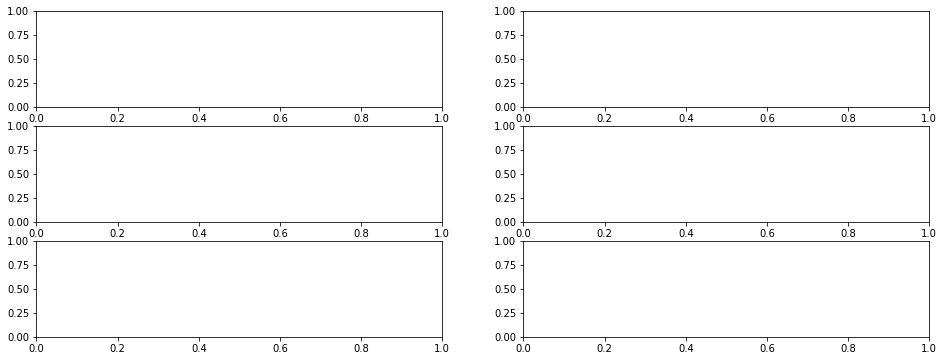

In [62]:
fig, ax = plt.subplots(3, 2, figsize=(16,6))


In [64]:
ax.shape

(3, 2)

In [67]:
graph_lookup

{ObjectId('5f29caf82518e5b6d7ce6db1'): {'_id': ObjectId('5f29caf82518e5b6d7ce6db1'),
  'process': 'powerlaw_cluster',
  'N': 10000,
  'params': {'m': 3, 'p': 0.4},
  'seed': 408991},
 ObjectId('5f29d5f92518e5b6d7ce74b9'): {'_id': ObjectId('5f29d5f92518e5b6d7ce74b9'),
  'process': 'powerlaw_cluster',
  'N': 10000,
  'params': {'m': 5, 'p': 0.4},
  'seed': 498141}}